##1.Data Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split into training and testing sets
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.Decision Tree Training

In [2]:
# Decision Tree with Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Decision Tree with Information Gain (Entropy)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# 3. Decision Tree Visualization

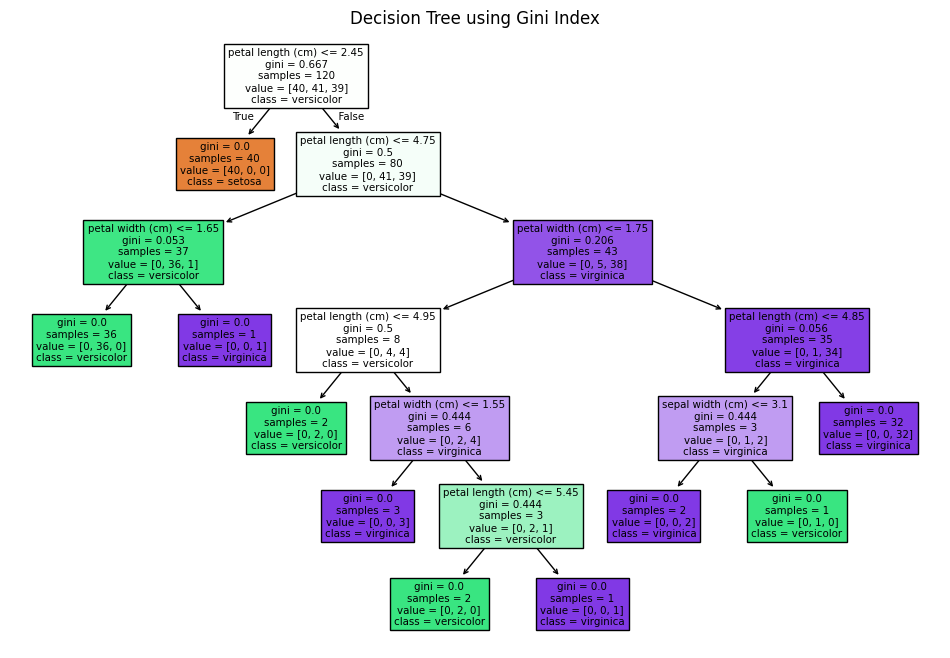

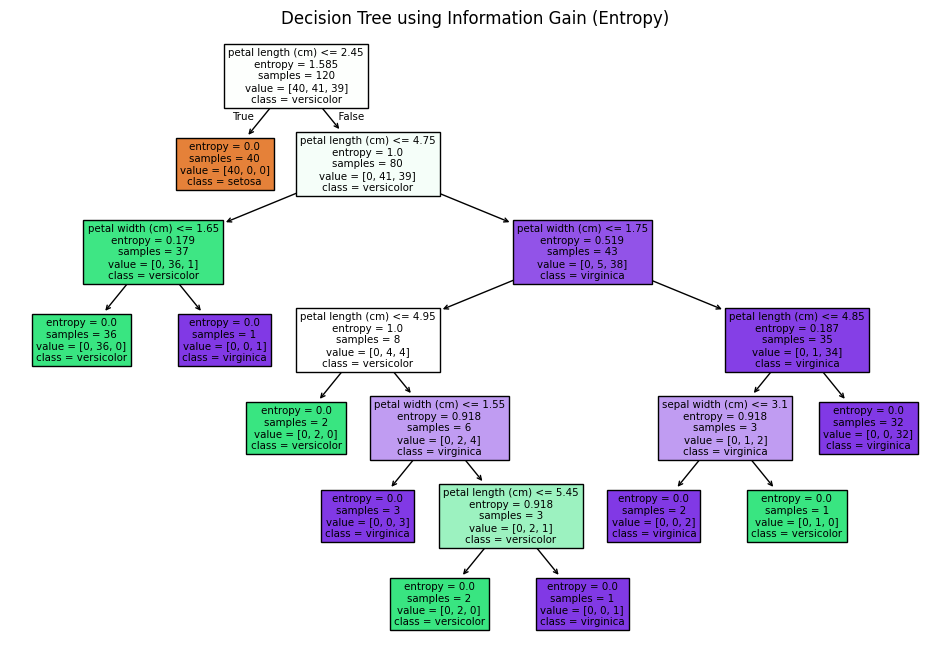

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree using Gini Index")
plt.savefig("decision_tree_gini.png")

plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree using Information Gain (Entropy)")
plt.savefig("decision_tree_entropy.png")

# 4. Model Evaluation

In [4]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Accuracy using Gini Index: {accuracy_gini}")
print(f"Accuracy using Information Gain (Entropy): {accuracy_entropy}")

Accuracy using Gini Index: 1.0
Accuracy using Information Gain (Entropy): 1.0


# 5. Hyperparameter Tuning

In [5]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


# 6. Visualizing the Best Model

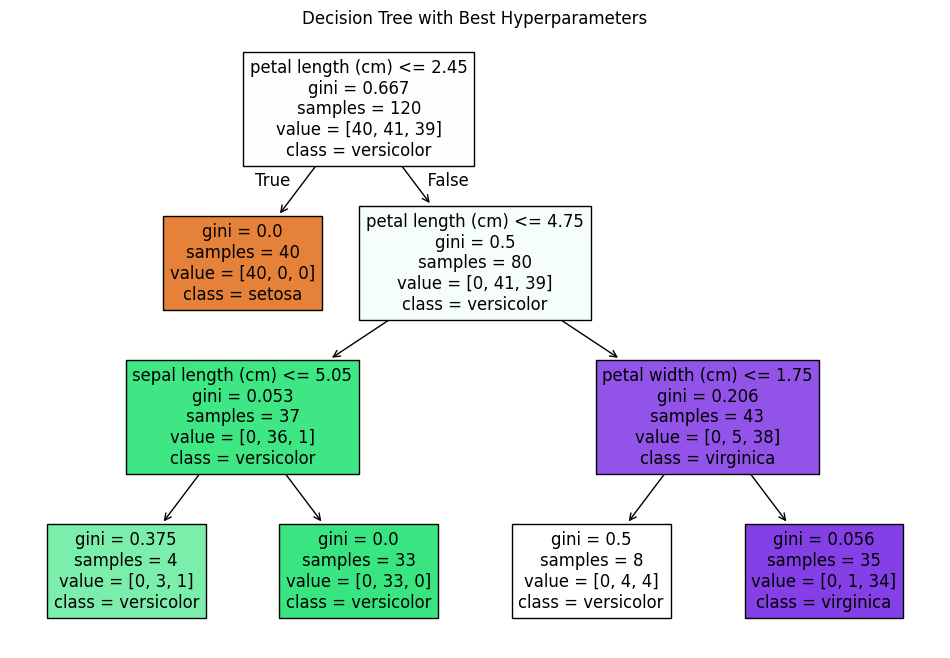

In [6]:
plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree with Best Hyperparameters")
plt.savefig("decision_tree_best.png")

# 7. Creating a Histogram

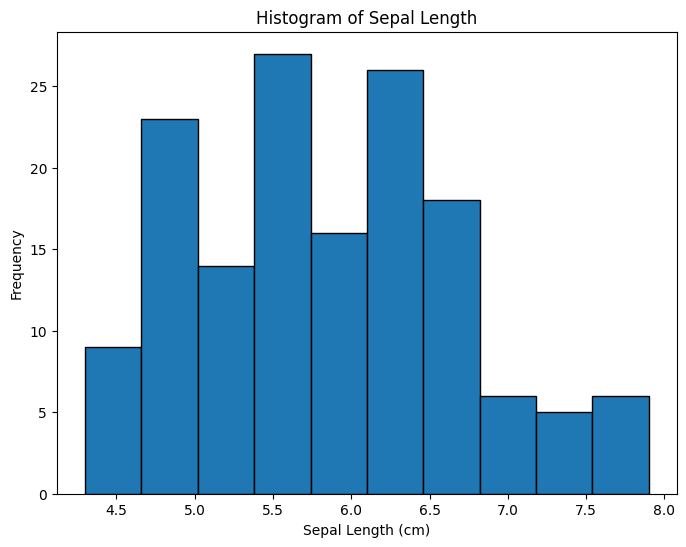

In [7]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Iris dataset
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(df['sepal length (cm)'], bins=10, edgecolor='black')  # 'bins' controls the number of bars
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()